# Task 1

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import calendar

In [3]:
df = pd.read_csv('Nat_Gas.csv')
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df.set_index('Dates', inplace=True)
df.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


Now the prices can be indexed based on the date

In [4]:
a = datetime(2020,10,31)
df.loc[a]

Prices    10.1
Name: 2020-10-31 00:00:00, dtype: float64

Visualizing the data

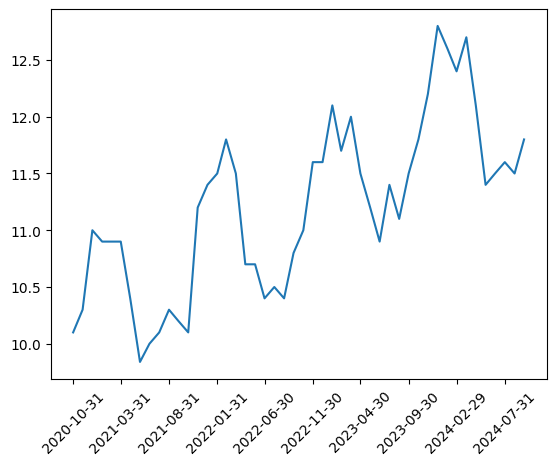

In [5]:
plt.plot(df.index,df['Prices'])
plt.xticks(df.index[::5], rotation=45)
plt.show()

In [ ]:
first = df.index[0]
last = df.index[-1]
print(first, last)

2020-10-31 00:00:00 2024-09-30 00:00:00


In [73]:
class Estimator:

    def __init__(self,start_range,end_range,dateframe):
        self.start_range = start_range
        self.end_range = end_range
        self.df = dateframe




    def estimate(self,date):
        if date > self.start_range and date < self.end_range:
            return self.estimate_past(date) 
        else:
            return self.predict_future(date)
    

    #this linearly interpolates from the prices of the two closest dates 
    def estimate_past(self,date):
        
        
        prev,next = self.get_surrounding_dates(date)
        price_prev = self.df.loc[prev].item()
        price_next = self.df.loc[next].item()

        #print(price_prev,price_next)


        total_span = (next - prev).total_seconds()
        elapsed = (date - prev).total_seconds()
        
        weight = elapsed / total_span
        interpolated = price_prev + weight * (price_next - price_prev)


        return interpolated
    

    #this takes the final two dates and extrapolates outward assuming constant slope
    def predict_future(self, date):

        last_two_dates = self.df.index[self.df.index <= self.end_range].sort_values()[-2:]
        
        t1, t2 = last_two_dates[0], last_two_dates[1]
        y1 = self.df.loc[t1].item()
        y2 = self.df.loc[t2].item()

        delta_t = (t2 - t1).total_seconds()
        slope = (y2 - y1) / delta_t

        delta_future = (date - t2).total_seconds()
        prediction = y2 + slope * delta_future

        return prediction



    
    def get_surrounding_dates(self,date):
        prev_month = date.replace(day=1) - timedelta(days=1)
        prev_eom = prev_month.replace(day=calendar.monthrange(prev_month.year, prev_month.month)[1])
    
        this_eom = date.replace(day=calendar.monthrange(date.year, date.month)[1])
    
        return (prev_eom, this_eom)




# Testing Basic Estimator

In [75]:
obj = Estimator(first,last,df)
dt = datetime(2022,2,20)
value = obj.estimate(dt) 
print(value)

11.714285714285715
